<a href="https://colab.research.google.com/github/keijoss/thesis_backend/blob/main/stomach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.DataFrame([
    {"Quiz ID": "Quiz 3", "Question ID": "Q1", "Question": "What is the primary function of the small intestine?",
     "Options": "a. Absorption of nutrients, b. Storage of waste, c. Production of bile, d. Filtering blood",
     "Correct Answer": "a", "Topic": "Small Intestine"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q2", "Question": "Which organ stores bile for digestion?",
     "Options": "a. Liver, b. Pancreas, c. Gallbladder, d. Small intestine",
     "Correct Answer": "c", "Topic": "Gallbladder"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q3", "Question": "What is the primary role of the pancreas?",
     "Options": "a. Produces insulin and digestive enzymes, b. Stores bile, c. Filters blood, d. Produces red blood cells",
     "Correct Answer": "a", "Topic": "Pancreas"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q4", "Question": "What is the primary function of the large intestine?",
     "Options": "a. Water absorption and feces formation, b. Digest protein, c. Produce insulin, d. Store nutrients",
     "Correct Answer": "a", "Topic": "Large Intestine"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q5", "Question": "Which organ produces bile to help digest fats?",
     "Options": "a. Liver, b. Pancreas, c. Gallbladder, d. Stomach",
     "Correct Answer": "a", "Topic": "Liver"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q6", "Question": "What part of the small intestine is responsible for most nutrient absorption?",
     "Options": "a. Duodenum, b. Jejunum, c. Ileum, d. Cecum",
     "Correct Answer": "b", "Topic": "Small Intestine"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q7", "Question": "What is a function of the liver besides producing bile?",
     "Options": "a. Store vitamins and minerals, b. Produce insulin, c. Absorb water, d. Filter lymph",
     "Correct Answer": "a", "Topic": "Liver"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q8", "Question": "Which part of the pancreas produces insulin?",
     "Options": "a. Exocrine tissue, b. Islets of Langerhans, c. Hepatocytes, d. Bile ducts",
     "Correct Answer": "b", "Topic": "Pancreas"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q9", "Question": "What is the purpose of the villi in the small intestine?",
     "Options": "a. Absorb nutrients, b. Store bile, c. Produce digestive enzymes, d. Filter toxins",
     "Correct Answer": "a", "Topic": "Small Intestine"},
    {"Quiz ID": "Quiz 3", "Question ID": "Q10", "Question": "What happens in the colon of the large intestine?",
     "Options": "a. Water and electrolytes are absorbed, b. Proteins are digested, c. Fats are emulsified, d. Insulin is produced",
     "Correct Answer": "a", "Topic": "Large Intestine"}
])

# Student answers example
student_answers = [
    {"Question ID": "Q1", "Answer": "a"},
    {"Question ID": "Q2", "Answer": "c"},
    {"Question ID": "Q3", "Answer": "a"},
    {"Question ID": "Q4", "Answer": "b"},  # Wrong
    {"Question ID": "Q5", "Answer": "a"},
    {"Question ID": "Q6", "Answer": "b"},
    {"Question ID": "Q7", "Answer": "a"},
    {"Question ID": "Q8", "Answer": "b"},
    {"Question ID": "Q9", "Answer": "a"},
    {"Question ID": "Q10", "Answer": "a"}
]

# Add 'User Answer' and 'Is Correct' columns
answers_df = pd.DataFrame(student_answers)
data = data.merge(answers_df, on="Question ID", how="left")
data["Is Correct"] = (data["Answer"] == data["Correct Answer"]).astype(int)

# Prepare data for training
X = pd.get_dummies(data[["Quiz ID", "Topic", "Answer"]])
y = data["Is Correct"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions
data["Predicted"] = model.predict(X)

# Calculate performance per topic
performance = data.groupby("Topic")["Is Correct"].mean().reset_index()
performance.columns = ["Topic", "Accuracy"]

# Suggest topics for review
threshold = 0.7  # Accuracy threshold
to_review = performance[performance["Accuracy"] < threshold]

# Display recommendations
print("Topics to Review:")
print(to_review)

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Topics to Review:
             Topic  Accuracy
1  Large Intestine       0.5
Model Accuracy: 100.00%


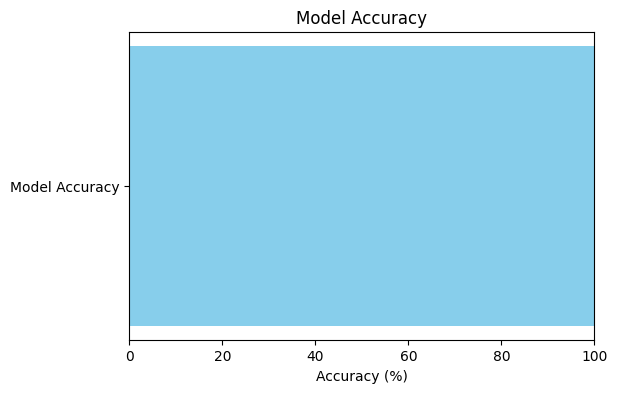

In [ ]:
import matplotlib.pyplot as plt

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
accuracy_percentage = accuracy * 100

# Plotting the accuracy
plt.figure(figsize=(6, 4))
plt.barh(['Model Accuracy'], [accuracy_percentage], color='skyblue')
plt.xlim(0, 100)  # Set x-axis range from 0 to 100
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

<ipython-input-4-a8418bfed02c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())


Model Accuracy: 100.00%


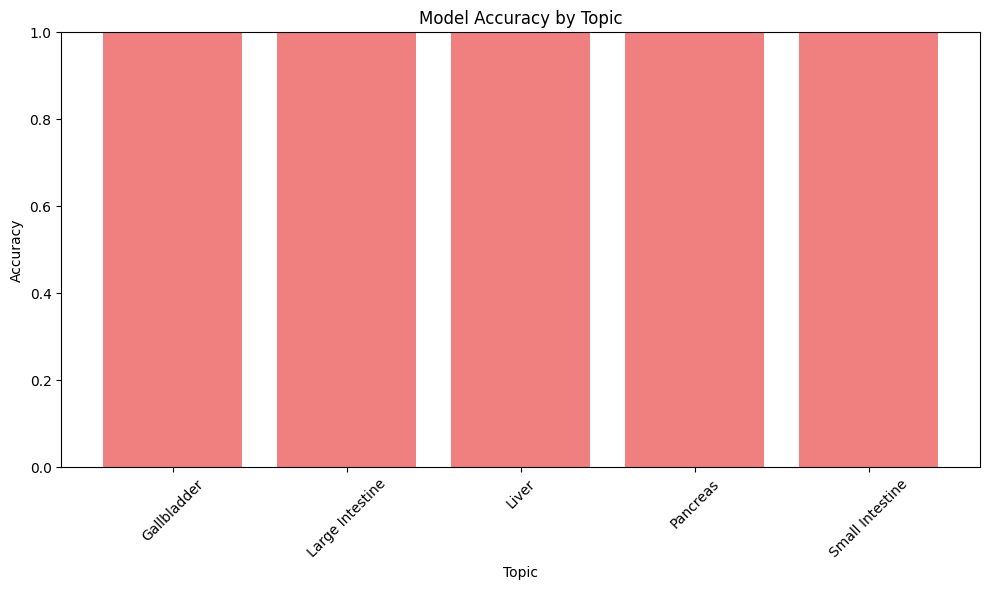

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is the correct DataFrame containing your predictions and correct labels
# Calculate accuracy per topic
topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())

# Print the overall model accuracy
accuracy = (data['Predicted'] == data['Is Correct']).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize accuracy by topic
plt.figure(figsize=(10, 6))
plt.bar(topic_accuracy.index, topic_accuracy.values, color='lightcoral')

plt.xlabel('Topic')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Topic')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Will be the filename of the trained model
filename = 'stomach_quiz_ai.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(data, file)

print(f"Model saved as {filename}")


Model saved as stomach_quiz_ai.pkl


In [ ]:
from google.colab import files

# Download the model file
files.download('stomach_quiz_ai.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>